In [28]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder

#Import dataset
data = pd.read_csv("dataset.csv", header=0)
data.shape
data.head()

,d 5100-0,d 5100-1,d 5100-2,d 5100-3,d 5100-4,d 5100-8,d 5100-9,d 5101-0,d 5101-1,d 5101-2,...,d 57022-8,d 57022-9,d 571-0,d 571-1,d 571-2,d 571-3,d 571-4,d 571-8,d 571-9,Classes
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,class6
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,class6
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,class6
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,class6
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,class6


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Columns: 204 entries, d 5100-0 to Classes
dtypes: int64(203), object(1)
memory usage: 111.7+ KB


In [30]:
data.describe()

,d 5100-0,d 5100-1,d 5100-2,d 5100-3,d 5100-4,d 5100-8,d 5100-9,d 5101-0,d 5101-1,d 5101-2,...,d 57022-4,d 57022-8,d 57022-9,d 571-0,d 571-1,d 571-2,d 571-3,d 571-4,d 571-8,d 571-9
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.0,70.0,70.0,70.000000,70.000000,...,70.000000,70.0,70.0,70.000000,70.000000,70.000000,70.000000,70.000000,70.0,70.0
mean,0.071429,0.142857,0.271429,0.171429,0.342857,0.0,0.0,0.0,0.100000,0.257143,...,0.014286,0.0,0.0,0.114286,0.328571,0.314286,0.157143,0.085714,0.0,0.0
std,0.259399,0.352454,0.447907,0.379604,0.478091,0.0,0.0,0.0,0.302166,0.440215,...,0.119523,0.0,0.0,0.320455,0.473085,0.467583,0.366563,0.281963,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
75%,0.000000,0.000000,1.000000,0.000000,1.000000,0.0,0.0,0.0,0.000000,0.750000,...,0.000000,0.0,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,1.000000,1.000000,...,1.000000,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0


In [31]:
print(data['Classes'].unique())      # Print unique values

['class6' 'class2' 'class4' 'class7' 'class1' 'class5' 'class3']


Column classes has 6 values. the first Idea herte is to apply the label encoder technique.

In [32]:
label_encoder = LabelEncoder()
data['Classes'] = label_encoder.fit_transform(data['Classes'])
data.head()

,d 5100-0,d 5100-1,d 5100-2,d 5100-3,d 5100-4,d 5100-8,d 5100-9,d 5101-0,d 5101-1,d 5101-2,...,d 57022-8,d 57022-9,d 571-0,d 571-1,d 571-2,d 571-3,d 571-4,d 571-8,d 571-9,Classes
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,5
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,5
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,5
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,5
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,5


Initialize PCA (Maybe further normalize) 

In [33]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)

pca = PCA(n_components=10)
principal_components = pca.fit_transform(X_scaled)

print(principal_components)

[[ 6.26077700e+00 -2.39470899e-01  5.07243383e-01 -8.90089470e-01
  -7.85355144e-01  1.36735765e+00  5.03286470e-01  6.35786841e-01
  -9.01516394e-01 -3.32578507e-01]
 [ 5.07159836e+00  2.40300403e-01 -2.13008621e-01  3.95014021e-02
  -3.01088257e+00 -1.90806259e+00  3.72413479e-01  1.57547371e-01
   3.63217149e-02 -5.13234536e-01]
 [ 3.63006551e+00 -8.18042919e-01  4.38277481e-01  5.97609239e-01
  -1.26672357e+00 -2.30375974e+00  5.01258927e-01  9.14571476e-01
  -1.72705665e-01  1.50305904e-01]
 [ 4.60794241e+00  1.67300658e+00 -9.00912997e-01  7.43049997e-01
  -2.03724326e+00 -2.61302095e+00  5.14648309e-01 -4.59044189e-01
  -3.39433642e-01 -1.05897826e+00]
 [ 2.24628305e+00 -2.23902302e-01  9.32712957e-01  2.35373291e+00
  -5.12417069e+00 -3.88882619e+00  5.87981388e+00 -1.06723154e+00
  -1.68814714e+00  1.86644089e+00]
 [-4.86239310e+00  9.29034682e+00  3.84910886e+00 -3.28340185e+00
   3.13625571e+00 -5.57128610e-01  2.37575064e+00  9.14939217e+00
   5.66145363e+00 -2.05483986e+00

In [34]:
data_pca = pd.DataFrame(data=principal_components, columns=[f'Principal Component {i}' for i in range(1, 11)])
data_pca.head()

,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4,Principal Component 5,Principal Component 6,Principal Component 7,Principal Component 8,Principal Component 9,Principal Component 10
0,6.260777,-0.239471,0.507243,-0.890089,-0.785355,1.367358,0.503286,0.635787,-0.901516,-0.332579
1,5.071598,0.240300,-0.213009,0.039501,-3.010883,-1.908063,0.372413,0.157547,0.036322,-0.513235
2,3.630066,-0.818043,0.438277,0.597609,-1.266724,-2.303760,0.501259,0.914571,-0.172706,0.150306
3,4.607942,1.673007,-0.900913,0.743050,-2.037243,-2.613021,0.514648,-0.459044,-0.339434,-1.058978
4,2.246283,-0.223902,0.932713,2.353733,-5.124171,-3.888826,5.879814,-1.067232,-1.688147,1.866441


In [35]:
variance_ratio = pca.explained_variance_ratio_[:5]
print("Explained Variance Ratios:", variance_ratio)
print("Total Explained Variance:", sum(variance_ratio))

Explained Variance Ratios: [0.18801489 0.14025756 0.09256869 0.05568944 0.04627767]
Total Explained Variance: 0.5228082538128339


The Variance is 52%. 

In [36]:
first_5_components = principal_components[:, :5]

# Compute the correlation matrix
correlation_matrix = np.corrcoef(first_5_components, rowvar=False)

print(correlation_matrix)

[[ 1.00000000e+00  1.17144478e-16  5.85480053e-17 -9.95668937e-18
   4.98499618e-17]
 [ 1.17144478e-16  1.00000000e+00  5.61425885e-17 -1.42594199e-16
  -1.94948782e-16]
 [ 5.85480053e-17  5.61425885e-17  1.00000000e+00  3.85539432e-16
   5.16616160e-17]
 [-9.95668937e-18 -1.42594199e-16  3.85539432e-16  1.00000000e+00
   9.36734212e-17]
 [ 4.98499618e-17 -1.94948782e-16  5.16616160e-17  9.36734212e-17
   1.00000000e+00]]


The values of all the components outside the main diagonal are quite close to 0, so, there is almost no correlation between these 5 components.


Apply t-SNE (method exact) on the same dataset for same number of components used in PCA and plot first three components.

In [37]:
t_sne = TSNE(n_components=10, method='exact')
X_tsne = t_sne.fit_transform(X_scaled)

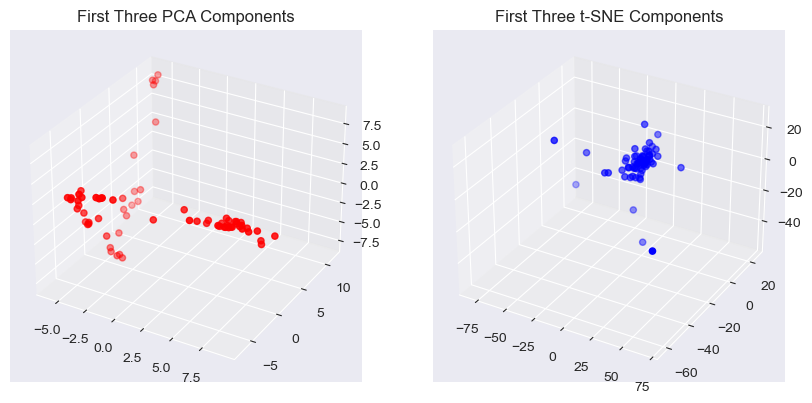

In [41]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(principal_components[:, 0], principal_components[:, 1], principal_components[:, 2], c='r', marker='o')
ax.set_title('First Three PCA Components')
ax = fig.add_subplot(122, projection='3d')
ax.scatter(X_tsne[:, 0], X_tsne[:, 1], X_tsne[:, 2], c='b', marker='o')
ax.set_title('First Three t-SNE Components')
plt.show()